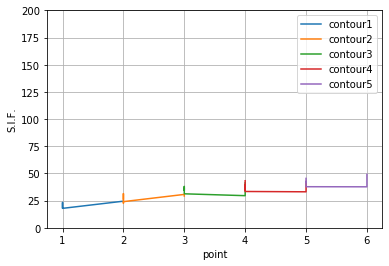

In [47]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import fracture

read = pd.read_excel('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\57_output_distance.xlsx')
read2 = pd.read_csv('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\data.csv', encoding = 'ISO-8859-1')
im =np.array(cv2.absdiff(cv2.imread('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\ff000001.jpg', cv2.IMREAD_GRAYSCALE ),
                         cv2.imread('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\ff000057.jpg', cv2.IMREAD_GRAYSCALE )))/255



crack_tip_loaction = np.array([[496,1473]])
data = np.array(read)
tension = np.array(read2)
tension_ml = tension[:,6]
tension_stress= tension[:,5]
ratio = 2/255*0.001 #70픽셀당 2mm , mm to m


distance=[]
Ml_intencity=[]
stress = []
K= []

for i in data:
    theta=i[5]
    calculater_location = np.array([[i[3],i[4]]])
    distance_value = cdist(calculater_location, crack_tip_loaction)*ratio
    distance = np.append(distance, distance_value)
    value = np.average(im[int(i[3]):int(i[3]+2),int(i[4]):int(i[4])+2])
    idx = (np.abs(tension_ml-value)).argmin()
    stress_value = tension_stress[idx]
    stress = np.append(stress,stress_value)
    Ml_intencity = np.append(Ml_intencity, value)
    k = fracture.K_deviator(stress_value, distance_value,theta*np.pi/180)
    K= np.append(K,k)

#graph part
fig, ax1 = plt.subplots()
line1 = ax1.plot(data[0:10,1],K[0:10], label="contour1")
line2 = ax1.plot(data[10:20,1],K[10:20], label="contour2")
line3 = ax1.plot(data[20:30,1],K[20:30], label="contour3")
line4 = ax1.plot(data[30:40,1],K[30:40], label="contour4")
line5 = ax1.plot(data[40:50,1],K[40:50], label="contour5")
lines = line1 + line2 + line3 + line4 + line5
labels = [l.get_label() for l in lines]
plt.grid()
plt.legend(lines, labels, loc=0)
plt.ylim(0,200)
plt.xlabel('point')
plt.ylabel('S.I.F.')
plt.savefig('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle/k그래프.png')
plt.show()

data_union = {'Contour N.o.': data[:,1], 'point': data[:,2],
              'location_y': data[:,3], 'location_x': data[:,4],
              'theta': data[:,5], 'distance':distance,
              'ml_intencity':Ml_intencity, 'Stress':stress, 'K':K}
df = pd.DataFrame(data_union)
df.to_excel('C:\\Users\ghrms\PycharmProjects\project\data\distance_angle\\kkk.xlsx')
